In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
sns.set_style('darkgrid')

In [3]:
## Load the timeseries data
LTFS = pd.read_csv('Datasets/train_data.csv', parse_dates=['application_date'], index_col='application_date')
LTFS.head()

,segment,branch_id,state,zone,case_count
application_date,,,,,
2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [4]:
LTFS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80402 entries, 2017-04-01 to 2019-07-23
Data columns (total 5 columns):
segment       80402 non-null int64
branch_id     66898 non-null float64
state         80402 non-null object
zone          66898 non-null object
case_count    80402 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 3.7+ MB


In [31]:
data1 = LTFS[LTFS.segment == 1].loc[:, 'case_count']
data2 = LTFS[LTFS.segment == 2].loc[:, 'case_count']

# Create two seperate dataframe from these two segment of data
LTFS_segment1 = pd.DataFrame(data1)
LTFS_segment2 = pd.DataFrame(data2)

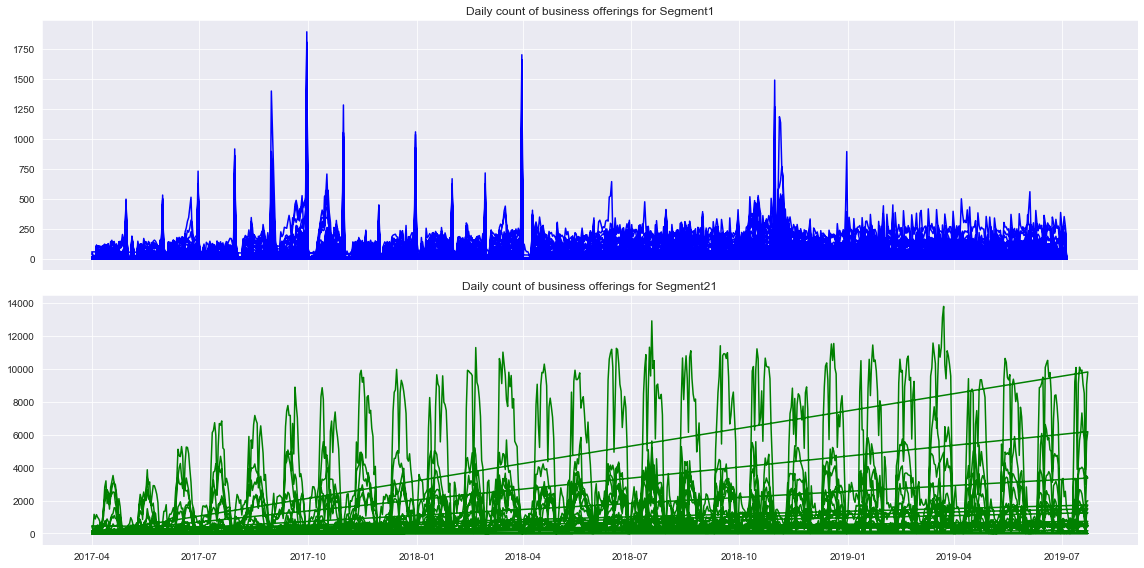

In [7]:
## Visualize The Datframe For Two Business Segment
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(16,8))
axes[0].plot(LTFS_segment1, 'b')
axes[0].set_title("Daily count of business offerings for Segment1")
axes[1].plot(LTFS_segment2, 'g')
axes[1].set_title("Daily count of business offerings for Segment21")
plt.tight_layout()
plt.show()

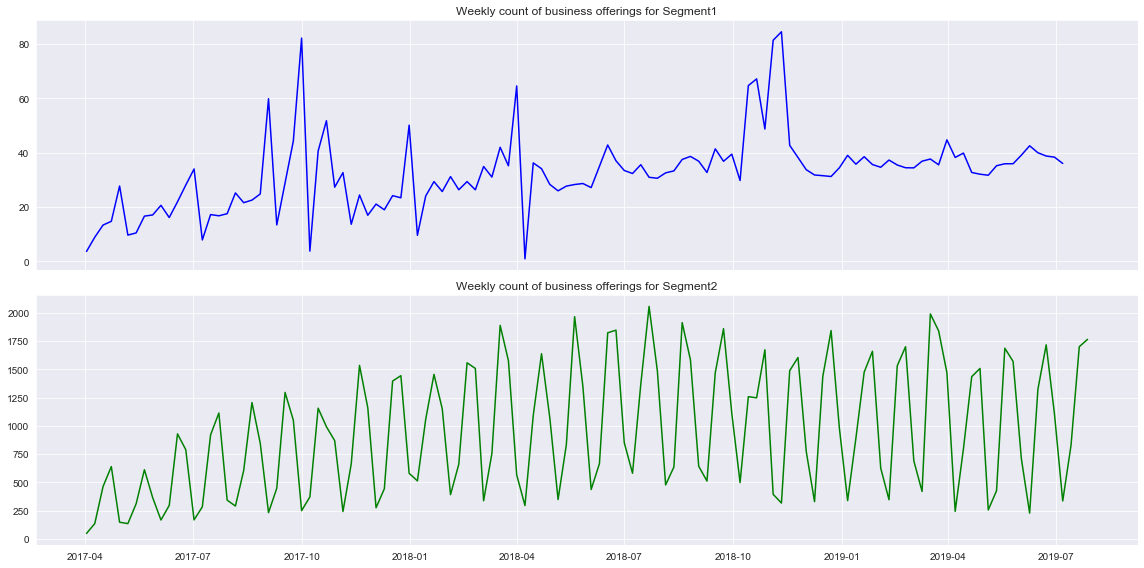

In [32]:
## Downsample The Time Series

LTFS_segment1 = LTFS_segment1.case_count.resample(rule='W').mean()
LTFS_segment2 = LTFS_segment2.case_count.resample(rule='W').mean()

## Visualize The Datframe For Two Business Segment
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(16,8))
axes[0].plot(LTFS_segment1, 'b')
axes[0].set_title("Weekly count of business offerings for Segment1")
axes[1].plot(LTFS_segment2, 'g')
axes[1].set_title("Weekly count of business offerings for Segment2")
plt.tight_layout()
plt.show()